In [11]:
import pandas as pd
import os

directory = 'filtered_data'
all_grouped = []

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        df = pd.read_csv(file_path)

        grouped = df.groupby('subjects_count').agg(
            average_score=('average_score', 'mean'),
            student_count=('average_score', 'size')
        ).reset_index()

        year = os.path.splitext(filename)[0]
        grouped['year'] = int(year)

        all_grouped.append(grouped)

final_df = pd.concat(all_grouped, ignore_index=True)

final_df = final_df[['year', 'subjects_count', 'student_count', 'average_score']]

# Вивести
print(final_df)


/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_29528/1565523651.py:10: DtypeWarning: Columns (96,97,100,102,103,104,105,116,117,120,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_29528/1565523651.py:10: DtypeWarning: Columns (117,118,121,123,124,125,126,137,138,141,143,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_29528/1565523651.py:10: DtypeWarning: Columns (8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/var/folders/5r/4d3mqngx3c3bynq7lh4_h3tr0000gn/T/ipykernel_29528/1565523651.py:10: DtypeWarning: Columns (100,116,117,120,122,123,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path

   year  subjects_count  student_count  average_score
0  2020               3         111450     144.674869
1  2020               4          89762     143.877578
2  2021               3          54982     149.071639
3  2021               4         111856     145.252179
4  2021               5          21771     139.196546
5  2023               3         256313     143.488288
6  2022               3         213647     151.401806
7  2019               3          87177     146.631266
8  2019               4          85557     145.215475
9  2024               4         264164     139.986065


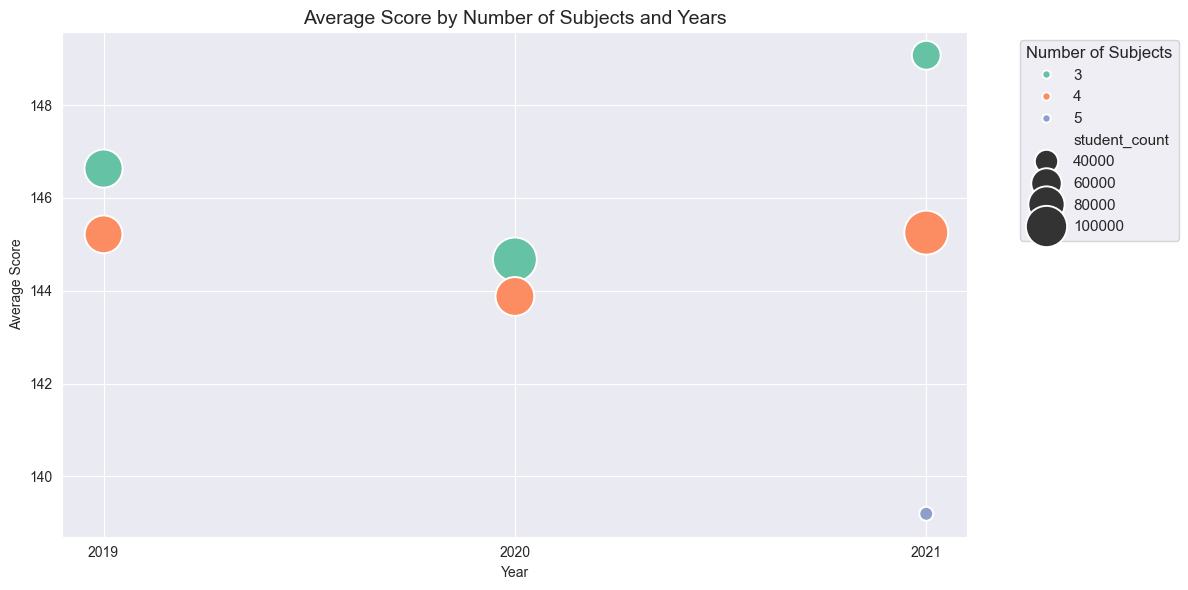

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering
year_counts = final_df['year'].value_counts()
valid_years = year_counts[year_counts >= 2].index
df_filtered = final_df[final_df['year'].isin(valid_years)]

# Plotting
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=df_filtered[df_filtered['subjects_count'] > 2],
    x='year',
    y='average_score',
    size='student_count',
    hue='subjects_count',
    sizes=(100, 1000),
    palette='Set2',
    legend='brief'
)

# Extract only the legend for hue
handles, labels = scatter.get_legend_handles_labels()
start_idx = next(i for i, l in enumerate(labels) if l.isdigit())

# New, clean legend only for subjects_count with larger font
plt.legend(
    handles[start_idx:],
    labels[start_idx:],
    title='Number of Subjects',
    title_fontsize=12,
    fontsize=11,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.title('Average Score by Number of Subjects and Years', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.xticks(sorted(df_filtered['year'].unique()))
plt.grid(True)
plt.tight_layout()
plt.show()